In [1]:
%matplotlib inline

In [2]:
import vtk
import numpy as np
from scipy import stats

In [3]:
# gs: gold standard
# in: input
gs_cst_left_fn = '/Shared/johnsonhj/HDNI/ReferenceData/HCP_DATA/test_UKF/100307/2_Rs_0_025/WMQL/wmqa_100307_cst.left.vtp'
in_cst_left_fn = '/Shared/johnsonhj/HDNI/ReferenceData/HCP_DATA/test_UKF/100307/1_Rs_default_0_02/WMQL/wmqa_100307_cst.left.vtp'

In [4]:
# read gold standard (gs)
file_reader1 = vtk.vtkXMLPolyDataReader()
file_reader1.SetFileName(gs_cst_left_fn)
file_reader1.Update()
gs_cst_left = file_reader1.GetOutput()
# read input
file_reader2 = vtk.vtkXMLPolyDataReader()
file_reader2.SetFileName(in_cst_left_fn)
file_reader2.Update()
in_cst_left = file_reader2.GetOutput()

In [19]:
print(gs_cst_left)

vtkPolyData (0x10a8c7300)
  Debug: Off
  Modified Time: 379
  Reference Count: 2
  Registered Events: (none)
  Source: (none)
  Information: 0x10a8c7090
  Data Released: False
  Global Release Data: Off
  UpdateTime: 403
  Release Data: Off
  UpdateExtent: Not Initialized
  Update Number Of Pieces: 1
  Update Piece: 0
  Update Ghost Level: 0
  MaximumNumberOfPieces: 1
  RequestExactExtent: Off
   Field Data:
    Debug: Off
    Modified Time: 269
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 28434
  Number Of Cells: 259
  Cell Data:
    Debug: Off
    Modified Time: 277
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
    Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 )
    Interpolate Flags: ( 1 1 1 1 1 0 0 1 )
    Pass Through Flags: ( 1 1 1 1 1 1 1 1 )
    Scalars: (none)
    Vectors: (none)
    Normals: (none)
   

In [7]:
gs_numPoints = gs_cst_left.GetNumberOfPoints()
in_numPoints = in_cst_left.GetNumberOfPoints()

gs_points = gs_cst_left.GetPoints()
in_points = in_cst_left.GetPoints()

In [16]:
print(gs_numPoints)
print(in_numPoints)
print('---')
print(gs_points)
print('---')
print(in_points)

28434
28235
---
vtkPoints (0x1143dd070)
  Debug: Off
  Modified Time: 325
  Reference Count: 2
  Registered Events: (none)
  Data: 0x1143dd510
  Data Array Name: Points
  Number Of Points: 28434
  Bounds: 
    Xmin,Xmax: (-63.4563, 18.0108)
    Ymin,Ymax: (-66.0334, 36.8692)
    Zmin,Zmax: (-65.4002, 67.9039)


---
vtkPoints (0x1143df940)
  Debug: Off
  Modified Time: 736
  Reference Count: 2
  Registered Events: (none)
  Data: 0x1143dfa60
  Data Array Name: Points
  Number Of Points: 28235
  Bounds: 
    Xmin,Xmax: (-64.6071, 18.0307)
    Ymin,Ymax: (-63.7205, 36.7826)
    Zmin,Zmax: (-65.2869, 67.8829)




In [9]:
#gs_points.GetPoint(0)[2]

In [10]:
gs_x_arr = np.array([gs_points.GetPoint(i)[0] for i in xrange(gs_numPoints)])
in_x_arr = np.array([in_points.GetPoint(i)[0] for i in xrange(in_numPoints)])
#---
gs_y_arr = np.array([gs_points.GetPoint(i)[1] for i in xrange(gs_numPoints)])
in_y_arr = np.array([in_points.GetPoint(i)[1] for i in xrange(in_numPoints)])
#---
gs_z_arr = np.array([gs_points.GetPoint(i)[2] for i in xrange(gs_numPoints)])
in_z_arr = np.array([in_points.GetPoint(i)[2] for i in xrange(in_numPoints)])

In [18]:
print min(gs_x_arr)
print max(gs_x_arr)

-63.456325531
18.0108203888


In [11]:
import pandas as pd
from ggplot import *

In [24]:
DF_gs_x = pd.DataFrame(np.transpose([gs_x_arr, gs_z_arr]))
DF_gs_x.rename(columns = lambda x: str(x), inplace=True)
DF_gs_x.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_gs_x.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_gs_x

,X,Y
0,-35.345718,56.836071
1,-34.617275,55.908226
2,-33.889755,54.973679
3,-33.181263,54.018185
4,-32.506466,53.038345
5,-31.844648,52.058994
6,-31.189528,51.087299
7,-30.536154,50.125664
8,-29.885801,49.170361
9,-29.253029,48.202427


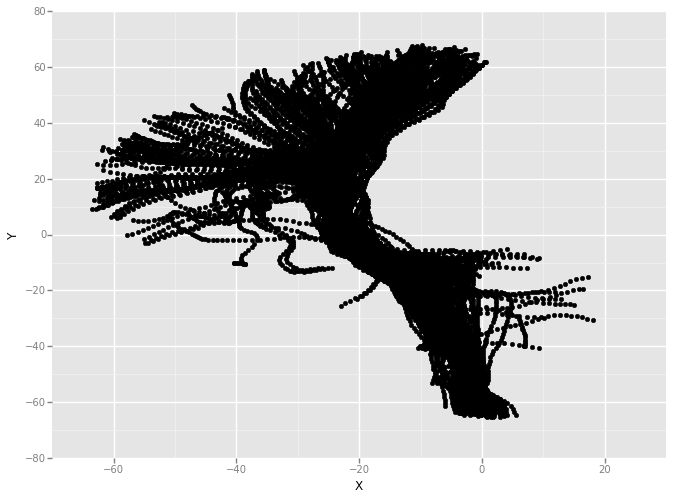

<ggplot: (306809841)>

In [25]:
ggplot(aes(x = 'X', y ='Y'),data=DF_gs_x) + \
    geom_point()

In [18]:
print(gs_x_arr)
print(in_x_arr)

[-35.34571838 -34.61727524 -33.88975525 ...,  -3.74897957  -2.8997364
  -2.00780916]
[-1.77106464 -1.52919436 -1.33055592 ..., -7.61741209 -8.18560696
 -8.74658203]


Use ksdensity to estimate probability density function for the sample data

In [19]:
data = gs_x_arr
kde = stats.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
p_gs_x = kde(x)
#----
data = gs_y_arr
kde = stats.gaussian_kde(data)
y = np.linspace(data.min(), data.max(), 100)
p_gs_y = kde(y)
#----
data = gs_z_arr
kde = stats.gaussian_kde(data)
z = np.linspace(data.min(), data.max(), 100)
p_gs_z = kde(z)

In [20]:
data = in_x_arr
kde = stats.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
p_in_x = kde(x)
#----
data = in_y_arr
kde = stats.gaussian_kde(data)
y = np.linspace(data.min(), data.max(), 100)
p_in_y = kde(y)
#----
data = in_z_arr
kde = stats.gaussian_kde(data)
z = np.linspace(data.min(), data.max(), 100)
p_in_z = kde(z)

In [21]:
import pandas as pd
from ggplot import *

/IPLlinux/raid0/homes/aghayoor/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


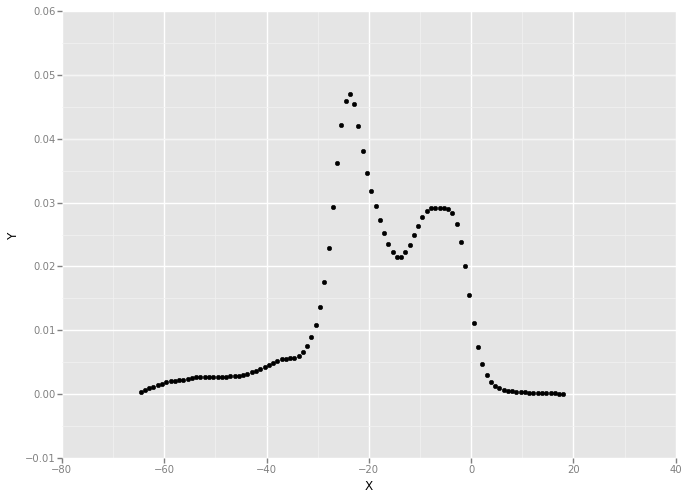

<ggplot: (315242217)>

In [22]:
DF_gs_x = pd.DataFrame(np.transpose([x, p_gs_x]))
DF_gs_x.rename(columns = lambda x: str(x), inplace=True)
DF_gs_x.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_gs_x.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
#DF_gs_x

ggplot(aes(x = 'X', y ='Y'),data=DF_gs_x) + \
    geom_point()

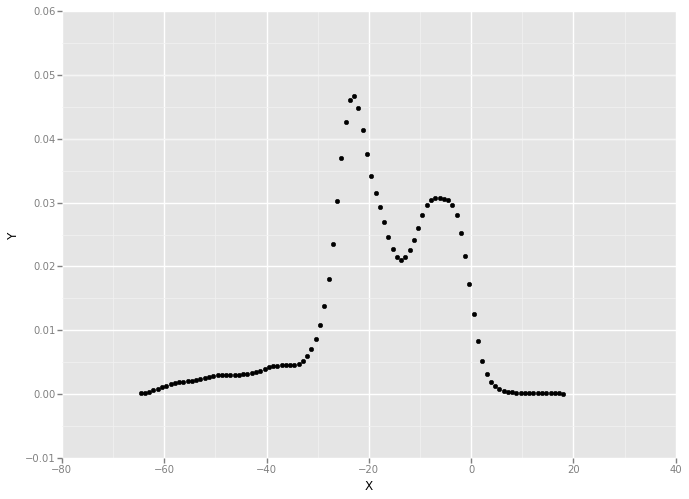

<ggplot: (315239409)>

In [23]:
DF_in_x = pd.DataFrame(np.transpose([x, p_in_x]))
DF_in_x.rename(columns = lambda x: str(x), inplace=True)
DF_in_x.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_in_x.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
#DF_in_x

ggplot(aes(x = 'X', y ='Y'),data=DF_in_x) + \
    geom_point()

# Bhattacharyya Coefficient

In [24]:
Bc = (1.0/3.0)*( np.sum(np.sqrt(p_gs_x * p_in_x)) + np.sum(np.sqrt(p_gs_y * p_in_y)) + np.sum(np.sqrt(p_gs_z * p_in_z)) )
print(Bc)

0.97080829719
